In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [4]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

import scipy
import scipy.stats as stats
import statsmodels.api as sm

# MODELLING


Data Processing Pipeline : 
- Outliers have been left in
- Dummification
- Feature Count: 34 (only first half of postcodes used)
- Standard Scaling applied
- Sparse Matrix Applied

In [1]:
modelling_dataset = "./data/modelling_dataset/modelling_dataset_brom_croy_2021_2022_freehold.csv"

In [6]:
df = pd.read_csv(modelling_dataset, sep='\t') 

In [84]:
#geocode_df = pd.read_csv('./data/bromley_croydon_clean/brom_croy_2021_2022_freehold_geocode_full.csv')

In [85]:
#geocode_dataset[geocode_dataset.result == 0].index

In [52]:
#[59, 807, 1796, 2846, 4055, 4539, 6224]

In [8]:
textual = ['postcode_half1', 'property_type']
numerical = ['bedrooms','bathrooms','lounges']
pred = ['last_sold_price_gbp']



#### Dummification

In [9]:
dum_df = pd.concat([pd.get_dummies(df[textual]), df[numerical]], axis=1)

In [143]:
dum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8607 entries, 0 to 8606
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   postcode_half1_BR1                    8607 non-null   uint8  
 1   postcode_half1_BR2                    8607 non-null   uint8  
 2   postcode_half1_BR3                    8607 non-null   uint8  
 3   postcode_half1_BR4                    8607 non-null   uint8  
 4   postcode_half1_BR5                    8607 non-null   uint8  
 5   postcode_half1_BR6                    8607 non-null   uint8  
 6   postcode_half1_BR7                    8607 non-null   uint8  
 7   postcode_half1_CR0                    8607 non-null   uint8  
 8   postcode_half1_CR2                    8607 non-null   uint8  
 9   postcode_half1_CR4                    8607 non-null   uint8  
 10  postcode_half1_CR5                    8607 non-null   uint8  
 11  postcode_half1_CR

In [196]:
#sparse_df = scipy.sparse.csr_matrix(dum_df.values)

In [55]:
X = dum_df
y = df[pred]

#Sparse Version
#X = sparse_df


#### Train Test Split

In [109]:
train_test_tuple = X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [65]:
kf = 5 #KFold(n_splits=5, shuffle=True, random_state=10)

#### Standardisation

In [110]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [67]:
X_train = scipy.sparse.csr_matrix(X_train)
X_test = scipy.sparse.csr_matrix(X_test)

#### Creating a Model Scoring Function

In [68]:
def model_scorer(model, X_tr, X_ts, y_tr, y_ts):
    """Convenience function to print model scores and return """
    train_score = model.score(X_tr, y_tr)
    print('Train score:', train_score)
    
    cv = cross_val_score(model, X_tr, y_tr, cv=kf)
    print('CV scores:', cv)
    print('CV standard deviation:', cv.std() )
    print('Mean CV score:', cv.mean())
    
    test_score = model.score(X_ts, y_ts)
    print('Test score:', model.score(X_ts, y_ts))
     
    return {"train_score":train_score,
            "cv_scores":cv,
            "test_score":test_score}

#### Linear Regression

In [69]:
lin_model_1 = LinearRegression()
lin_model_1.fit(X_train, y_train)


LinearRegression()

In [70]:
model_scorer(lin_model_1, X_train, X_test, y_train, y_test);

Train score: 0.5208370718960034
CV scores: [0.56356795 0.46042765 0.4865006  0.57756103 0.50179974]
CV standard deviation: 0.04515127248320018
Mean CV score: 0.5179713954262055
Test score: 0.4478764681358799


#### Decision Tree

In [71]:
dt_model_1 = DecisionTreeRegressor()
dt_model_1.fit(X_train, y_train)

DecisionTreeRegressor()

In [72]:
model_scorer(dt_model_1, *train_test_tuple);

Train score: -0.7211696255349958
CV scores: [0.61567374 0.53576068 0.56827073 0.20723418 0.61540318]
CV standard deviation: 0.15361723708372335
Mean CV score: 0.5084685020169315
Test score: -0.5509558301414188


#### Random Forest

In [73]:
rf_model_1 = RandomForestRegressor()
rf_model_1.fit(X_train, y_train.values.flatten())

RandomForestRegressor()

In [75]:
model_scorer(rf_model_1, X_train, X_test, y_train.values.flatten(), y_test.values.flatten());

Train score: 0.8066766889494361
CV scores: [0.61648212 0.51450599 0.58061463 0.41661264 0.65683523]
CV standard deviation: 0.08435306536047958
Mean CV score: 0.5570101204228122
Test score: 0.4768095085316163


### Modellling with Regularisation

In [76]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, Ridge, Lasso, ElasticNet

#### Ridge

In [77]:
np.logspace(-10,10,11)

array([1.e-10, 1.e-08, 1.e-06, 1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04,
       1.e+06, 1.e+08, 1.e+10])

In [78]:
ridge_cv_1 = RidgeCV(alphas=np.logspace(-10,10,11))
ridge_cv_1.fit(X_train,y_train)

RidgeCV(alphas=array([1.e-10, 1.e-08, 1.e-06, 1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04,
       1.e+06, 1.e+08, 1.e+10]))

In [79]:
ridge_cv_1.alpha_

100.0

In [80]:
ridge_cv_2 = RidgeCV(alphas=np.logspace(-2,2,11))
ridge_cv_2.fit(X_train,y_train)

RidgeCV(alphas=array([1.00000000e-02, 2.51188643e-02, 6.30957344e-02, 1.58489319e-01,
       3.98107171e-01, 1.00000000e+00, 2.51188643e+00, 6.30957344e+00,
       1.58489319e+01, 3.98107171e+01, 1.00000000e+02]))

In [81]:
ridge_cv_2.alpha_

100.0

In [82]:
ridge_cv_3 = RidgeCV(alphas=np.linspace(1.58489319e-01,1.00000000e+00, 21))
ridge_cv_3.fit(X_train,y_train)

RidgeCV(alphas=array([0.15848932, 0.20056485, 0.24264039, 0.28471592, 0.32679146,
       0.36886699, 0.41094252, 0.45301806, 0.49509359, 0.53716913,
       0.57924466, 0.62132019, 0.66339573, 0.70547126, 0.7475468 ,
       0.78962233, 0.83169786, 0.8737734 , 0.91584893, 0.95792447,
       1.        ]))

In [83]:
ridge_cv_3.alpha_

1.0

In [84]:
ridge_cv_4 = RidgeCV(alphas=np.linspace(0.36886699,0.41094252, 21))
ridge_cv_4.fit(X_train,y_train)

RidgeCV(alphas=array([0.36886699, 0.37097077, 0.37307454, 0.37517832, 0.3772821 ,
       0.37938587, 0.38148965, 0.38359343, 0.3856972 , 0.38780098,
       0.38990475, 0.39200853, 0.39411231, 0.39621608, 0.39831986,
       0.40042364, 0.40252741, 0.40463119, 0.40673497, 0.40883874,
       0.41094252]))

In [85]:
ridge_cv_4.alpha_

0.41094252

In [86]:
ridge_alpha_1 = ridge_cv_1.alpha_
ridge_model_1 = Ridge(alpha=ridge_alpha_1)
ridge_model_1.fit(X_train, y_train)

Ridge(alpha=100.0)

In [87]:
model_scorer(ridge_model_1, *train_test_tuple);

Train score: -1.2456316000611927
CV scores: [0.56258594 0.45889924 0.48050167 0.56702585 0.49926867]
CV standard deviation: 0.043696652077294895
Mean CV score: 0.5136562755598664
Test score: -0.7391503649989981


In [88]:
ridge_model_1.alpha

100.0

In [89]:
ridge_alpha_2 = ridge_cv_2.alpha_
ridge_model_2 = Ridge(alpha=ridge_alpha_2)
ridge_model_2.fit(X_train, y_train)

Ridge(alpha=100.0)

In [90]:
model_scorer(ridge_model_2, *train_test_tuple);

Train score: -1.2456316000611927
CV scores: [0.56258594 0.45889924 0.48050167 0.56702585 0.49926867]
CV standard deviation: 0.043696652077294895
Mean CV score: 0.5136562755598664
Test score: -0.7391503649989981


In [91]:
ridge_model_2.alpha

100.0

In [92]:
ridge_alpha_3 = ridge_cv_3.alpha_
ridge_model_3 = Ridge(alpha=ridge_alpha_3)
ridge_model_3.fit(X_train, y_train)

Ridge()

In [93]:
model_scorer(ridge_model_3, *train_test_tuple);

Train score: -1.262947377327671
CV scores: [0.56430201 0.46053871 0.48648763 0.57716501 0.50214704]
CV standard deviation: 0.04514518329124995
Mean CV score: 0.5181280791446058
Test score: -0.7508245844841348


#### Lasso

In [94]:
lasso_cv_1 = LassoCV()
lasso_cv_1.fit(X_train, y_train.values.flatten())


LassoCV()

In [95]:
lasso_alpha = lasso_cv_1.alpha_
lasso_model_1 = Lasso(alpha=lasso_alpha)
lasso_model_1.fit(X_train, y_train.values.flatten())

Lasso(alpha=224.38193797982797)

In [96]:
model_scorer(lasso_model_1, X_train, X_test, y_train.values.flatten(), y_test.values.flatten());

Train score: 0.5208219097507876
CV scores: [0.56373137 0.46044145 0.48654931 0.57763973 0.50179147]
CV standard deviation: 0.04519535534986167
Mean CV score: 0.5180306674511377
Test score: 0.4477543470737657


#### ElasticNet

In [97]:
alpha_list=np.logspace(-10, 10, 21), 
l1_list=np.array([.1, .5, .7, .9, .95, .99, 1]),


elasticnet_cv_1 = ElasticNetCV(l1_ratio=l1_list,
                               alphas=alpha_list,
                               cv=5, max_iter=100000
                              )
elasticnet_cv_1.fit(X_train,y_train.values.flatten())

ElasticNetCV()

In [98]:
elasticnet_cv_1.l1_ratio_

0.5

In [99]:
elasticnet_cv_1.alpha_

339.47341489475417

In [100]:
elasticnet_alpha = elasticnet_cv_1.alpha_
elasticnet_l1 = elasticnet_cv_1.l1_ratio_
elasticnet_model_1 = ElasticNet(alpha=elasticnet_alpha, l1_ratio=elasticnet_l1)
elasticnet_model_1.fit(X_train, y_train.values.flatten())


ElasticNet(alpha=339.47341489475417)

In [101]:
model_scorer(elasticnet_model_1, X_train, X_test, y_train.values.flatten(), y_test.values.flatten());

Train score: 0.013986573604935493
CV scores: [0.01474226 0.01191389 0.0133408  0.01476399 0.01062408]
CV standard deviation: 0.0016160570128014203
Mean CV score: 0.01307700303709769
Test score: 0.007684954017192602


### BOOSTING

In [102]:
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor

#### AdaBoost

In [103]:
base_estimator = DecisionTreeRegressor()
ada_model_1 = AdaBoostRegressor(base_estimator=base_estimator,
                          n_estimators=100,
                          random_state=1)
ada_model_1.fit(X_train, y_train.values.flatten())


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100,
                  random_state=1)

In [104]:
model_scorer(ada_model_1, X_train, X_test, y_train.values.flatten(), y_test.values.flatten());

Train score: 0.8007393584362816
CV scores: [0.64199428 0.47289913 0.51700534 0.17997371 0.68586648]
CV standard deviation: 0.17784721895048408
Mean CV score: 0.4995477874678211
Test score: 0.4254380003357764


#### Gradient Boost

In [105]:
gradientBoost_model_1 = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=1)

gradientBoost_model_1.fit(X_train, y_train.values.flatten())


GradientBoostingRegressor(random_state=1)

In [131]:
model_scorer(gradientBoost_model_1, X_train, X_test, y_train.values.flatten(), y_test.values.flatten());

Train score: 0.624548719469147
CV scores: [0.52508176 0.54476302 0.61108977 0.66398594 0.44504253]
CV standard deviation: 0.07492631255071426
Mean CV score: 0.5579926017246082
Test score: 0.6998743799512508


#### Neural Net Model

In [133]:
from sklearn.neural_network import MLPRegressor

In [135]:
nnet = MLPRegressor(hidden_layer_sizes=(4,3),
                    solver='adam', activation='relu', alpha=1,
                    max_iter = 10000, random_state=1
                   )
nnet.fit(X_train, y_train.values.flatten())


MLPRegressor(alpha=1, hidden_layer_sizes=(4, 3), max_iter=10000, random_state=1)

In [136]:
nnet.score(X_test, y_test)

0.584965049993089

# SCIPY.STATSMODEL REGRESSION MODEL

In [114]:
sm.add_constant(X_train)

array([[ 1.        , -0.36335786,  2.38421182, ..., -1.31524101,
        -0.59785212, -1.02319532],
       [ 1.        ,  2.75210776, -0.41942582, ..., -1.31524101,
        -0.59785212, -1.02319532],
       [ 1.        , -0.36335786,  2.38421182, ...,  1.98604749,
         0.75084115,  0.37567278],
       ...,
       [ 1.        , -0.36335786, -0.41942582, ..., -0.21481151,
         0.75084115,  0.37567278],
       [ 1.        , -0.36335786, -0.41942582, ..., -0.21481151,
        -0.59785212, -1.02319532],
       [ 1.        ,  2.75210776, -0.41942582, ..., -0.21481151,
        -0.59785212, -1.02319532]])

In [115]:
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()

In [116]:
predictions = results.predict(sm.add_constant(X))
print("R2-score: ", results.rsquared)
print("RMSE:", np.sqrt(mean_squared_error(y, predictions)))

R2-score:  0.48505971545522963
RMSE: 1.6139107893080346e+17


## Statsmodel Results

In [130]:
results.summary(xname=["const."]+[each for each in X.columns])

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     last_sold_price_gbp   R-squared:                       0.485
Model:                             OLS   Adj. R-squared:                  0.483
Method:                  Least Squares   F-statistic:                     201.7
Date:                 Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                         11:08:29   Log-Likelihood:                -94915.
No. Observations:                 6885   AIC:                         1.899e+05
Df Residuals:                     6852   BIC:                         1.901e+05
Df Model:                           32                                         
Covariance Type:             nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const.                                5.857e+05   2837.968    206.378      0.000     5.8e+05    5.91e+05
postcode_half1_BR1                    1.991e+17   5.21e+17      0.382      0.703   -8.23e+17    1.22e+18
postcode_half1_BR2                    2.213e+17   5.79e+17      0.382      0.703   -9.15e+17    1.36e+18
postcode_half1_BR3                     1.46e+17   3.82e+17      0.382      0.703   -6.03e+17    8.95e+17
postcode_half1_BR4                    1.052e+17   2.75e+17      0.382      0.703   -4.35e+17    6.45e+17
postcode_half1_BR5                    1.664e+17   4.36e+17      0.382      0.703   -6.88e+17    1.02e+18
postcode_half1_BR6                    1.784e+17   4.67e+17      0.382      0.703   -7.37e+17    1.09e+18
postcode_half1_BR7                    1.131e+17   2.96e+17      0.382      0.703   -4.67e+17    6.94e+17
postcode_half1_CR0                    2.256e+17   5.91e+17      0.382      0.703   -9.32e+17    1.38e+18
postcode_half1_CR2                    1.622e+17   4.25e+17      0.382      0.703    -6.7e+17    9.95e+17
postcode_half1_CR4                    1.399e+17   3.66e+17      0.382      0.703   -5.78e+17    8.58e+17
postcode_half1_CR5                      1.5e+17   3.93e+17      0.382      0.703    -6.2e+17     9.2e+17
postcode_half1_CR7                    1.221e+17    3.2e+17      0.382      0.703   -5.05e+17    7.49e+17
postcode_half1_CR8                    1.415e+17   3.71e+17      0.382      0.703   -5.85e+17    8.68e+17
property_type_bungalow property       -4.75e+15   1.24e+16     -0.382      0.703   -2.91e+16    1.96e+16
property_type_converted flat         -1.134e+15   2.97e+15     -0.382      0.703   -6.96e+15    4.69e+15
property_type_detached bungalow       -8.41e+15    2.2e+16     -0.382      0.703   -5.16e+16    3.48e+16
property_type_detached house          -2.08e+16   5.45e+16     -0.382      0.703   -1.28e+17     8.6e+16
property_type_detached property      -3.459e+15   9.06e+15     -0.382      0.703   -2.12e+16    1.43e+16
property_type_end terrace bungalow   -6.549e+14   1.71e+15     -0.382      0.703   -4.02e+15    2.71e+15
property_type_end terrace house      -1.794e+16    4.7e+16     -0.382      0.703    -1.1e+17    7.42e+16
property_type_end terrace property   -1.732e+15   4.54e+15     -0.382      0.703   -1.06e+16    7.16e+15
property_type_flat/maisonette        -2.617e+15   6.85e+15     -0.382      0.703    -1.6e+16    1.08e+16
property_type_mid terrace bungalow   -1.134e+15   2.97e+15     -0.382      0.703   -6.96e+15    4.69e+15
property_type_mid terrace house      -2.144e+16   5.61e+16     -0.382      0.703   -1.31e+17    8.86e+16
property_type_purpose built flat     -1.851e+15   4.85e+15     -0.382      0.703   -1.14e+16    7.65e+15
property_type_semi-detached

# COEFFICIENT ANALYSIS

In [53]:
# collect the model coefficients in a dataframe
lin_model_1_coefs = pd.DataFrame(lin_model_1.coef_.flatten(), index=X.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
lin_model_1_coefs['coef_abs'] = lin_model_1_coefs.coefficients.abs()
#lin_model_1_coefs.sort_values('coef_abs', ascending=False).head(20)

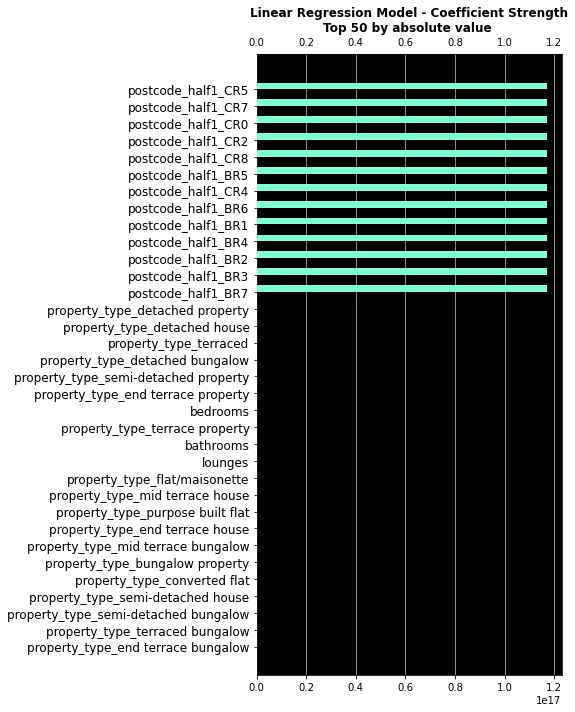

In [54]:
# plot the magnitude of the coefficients
fig, ax = plt.subplots(figsize=(8,10))
n_values_to_display = 50
plt_x = lin_model_1_coefs['coef_abs'].sort_values( ascending=False)[:n_values_to_display][::-1]
plt_y = lin_model_1_coefs[['coef_abs']].sort_values('coef_abs', ascending=False)[:n_values_to_display].index[::-1]

ax.barh(y=plt_y, width=plt_x, height=0.4, color='aquamarine', align='edge', zorder=3)
plt.yticks(fontsize=12) #fontdict={"fontsize":10})
#lin_model_1_coefs['coef_abs'].sort_values(ascending=False)[:20].plot(kind='barh', figsize=(10,20), color='purple')
ax.set_title(f"Linear Regression Model - Coefficient Strength\nTop {n_values_to_display} by absolute value ", fontweight='bold')#fontdict={'fontweight':"b"})

ax.set_facecolor('black')
ax.grid(axis='x', zorder=0)
ax.tick_params(labeltop=True)
plt.tight_layout();

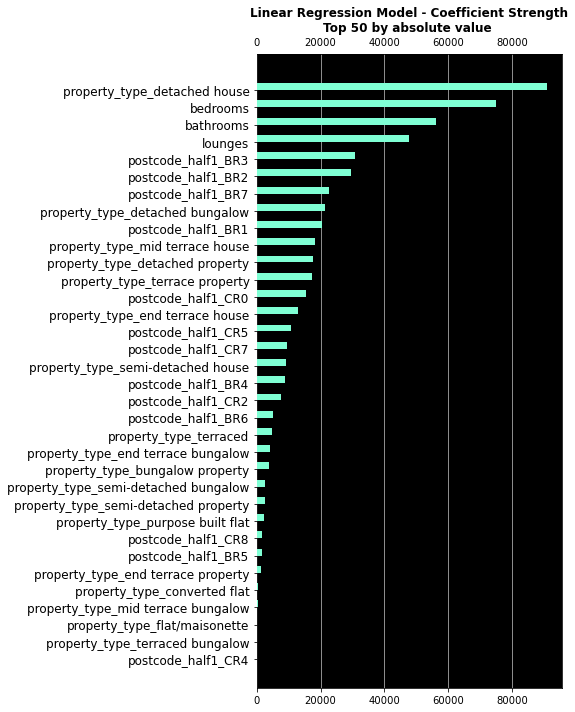

In [132]:
# collect the model coefficients in a dataframe
lasso_model_1_coefs = pd.DataFrame(lasso_model_1.coef_.flatten(), index=X.columns,
                       columns=['coefficients'])
# calculate the absolute values of the coefficients
lasso_model_1_coefs['coef_abs'] = lasso_model_1_coefs.coefficients.abs()
#lasso_model_1_coefs.sort_values('coef_abs', ascending=False).head(20)


# plot the magnitude of the coefficients
fig, ax = plt.subplots(figsize=(8,10))
n_values_to_display = 50
plt_x = lasso_model_1_coefs['coef_abs'].sort_values( ascending=False)[:n_values_to_display][::-1]
plt_y = lasso_model_1_coefs[['coef_abs']].sort_values('coef_abs', ascending=False)[:n_values_to_display].index[::-1]

ax.barh(y=plt_y, width=plt_x, height=0.4, color='aquamarine', align='edge', zorder=3)
plt.yticks(fontsize=12) #fontdict={"fontsize":10})
#lasso_model_1_coefs['coef_abs'].sort_values(ascending=False)[:20].plot(kind='barh', figsize=(10,20), color='purple')
ax.set_title(f"Linear Regression Model - Coefficient Strength\nTop {n_values_to_display} by absolute value ", fontweight='bold')#fontdict={'fontweight':"b"})

ax.set_facecolor('black')
ax.grid(axis='x', zorder=0)
ax.tick_params(labeltop=True)
plt.tight_layout();

### Visually looking at residuals 
Minus the predictions from the true to get residuals. Plot a histogram to see if normally distributed. Find some measure of normality to confirm

### Visually testing predictions


In [175]:
y_test.iloc[25]

last_sold_price_gbp    532500.0
Name: 70352, dtype: float64

In [176]:
lin_model_1.predict(X_test[25])

array([[573118.31715066]])

In [177]:
rf_model_1.predict(X_test[25])

array([548880.])

In [178]:
dt_model_1.predict(X_test[25])

array([575000.])

# CONCLUSIONS


The best score achieved was using a ________ model. This means we can predict the true value of properties in the given areas of London with an accuracy of __% using our best model. 

The coefficients which had the largest affect on our score were:
-
-
-
-



# NEXT STEPS


Our model should be improved in a number of ways. 

Next goals of the model are to scrape all available properties in London (circa 3.5 Million). 